In [ ]:
#Problem 1

In [1]:
from sympy import *
x = symbols('x')
diff((sin(x)+1)**sin(cos(x)),x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [2]:
def function(x):
    y=(sin(x)+1)**sin(cos(x))
    return y

In [3]:
def function_difference(x):
    diff=(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))
    return diff

In [4]:
import numpy as np
cvec = np.linspace(-np.pi, np.pi, 100)
f = np.array([function(x) for x in cvec])
f_deriva = np.array([function_difference(x) for x in cvec])

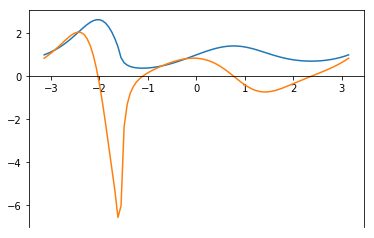

In [6]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f)
plt.plot(cvec, f_deriva)
plt.show()

In [ ]:
#Problem 2

In [7]:
def forward_1(f, x, h):
    forward_formula_1 = (f(x + h) - f(x)) / h
    return forward_formula_1
def forward_2(f, x, h):
    forward_formula_2 = (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
    return forward_formula_2
def backward_1(f, x, h):
    backward_formula_1 = (f(x) - f(x - h)) / h
    return backward_formula_1
def backward_2(f, x, h):
    backward_formula_2 = (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/(2 * h)
    return backward_formula_2
def centered_1(f, x, h):
    centered_formula_1 = (f(x + h) - f(x - h)) / (2 * h)
    return centered_formula_1
def centered_2(f, x, h):
    centered_formula_2 = (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
    return centered_formula_2

In [8]:
g = 10 ** (-3)
a1 = np.array([forward_1(function, x, g) for x in cvec])
a2 = np.array([forward_2(function, x, g) for x in cvec])
a3 = np.array([backward_1(function, x, g) for x in cvec])
a4 = np.array([backward_2(function, x, g) for x in cvec])
a5 = np.array([centered_1(function, x, g) for x in cvec])
a6 = np.array([centered_2(function, x, g) for x in cvec])

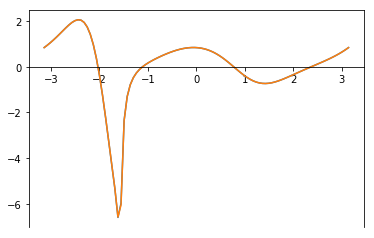

In [9]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, a1)
plt.plot(cvec, f_deriva)
plt.show()

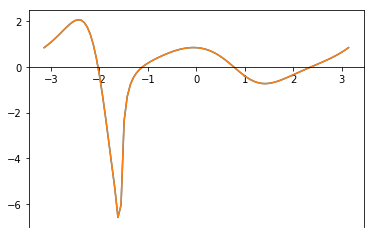

In [10]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, a2)
plt.plot(cvec, f_deriva)
plt.show()

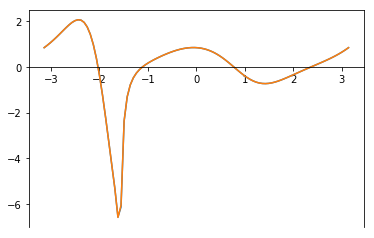

In [11]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, a3)
plt.plot(cvec, f_deriva)
plt.show()

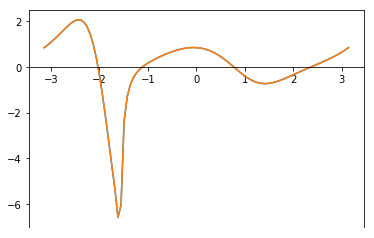

In [12]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, a4)
plt.plot(cvec, f_deriva)
plt.show()

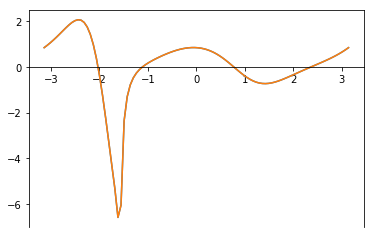

In [13]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, a5)
plt.plot(cvec, f_deriva)
plt.show()

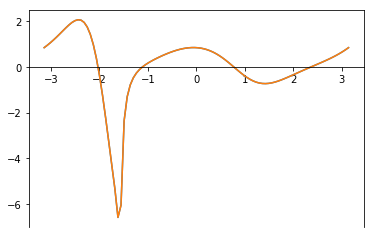

In [14]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, a6)
plt.plot(cvec, f_deriva)
plt.show()

In [ ]:
#Problem 3

In [15]:
x0 = np.pi
f0 = function_difference(x0)
vec = np.logspace(-8, 0, 9)

In [16]:
def error_array(f, x, h):
    appro_deriva = np.array([f(function, x, h) for h in vec])
    error_abs = abs(appro_deriva - f0)
    return error_abs

In [17]:
error_forward_1 = error_array(forward_1, x0, g)
error_forward_2 = error_array(forward_2, x0, g)
error_backward_1 = error_array(backward_1, x0, g)
error_backward_2 = error_array(backward_2, x0, g)
error_centered_1 = error_array(centered_1, x0 ,g)
error_centered_2 = error_array(centered_2, x0, g)

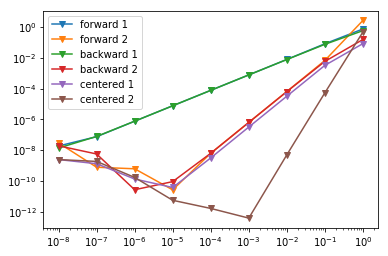

In [18]:
plt.loglog(vec, error_forward_1, marker = 'v')
plt.loglog(vec, error_forward_2, marker = 'v')
plt.loglog(vec, error_backward_1, marker = 'v')
plt.loglog(vec, error_backward_2, marker = 'v')
plt.loglog(vec, error_centered_1, marker = 'v')
plt.loglog(vec, error_centered_2, marker = 'v')
plt.legend(['forward 1', 'forward 2', 'backward 1', 'backward 2', 'centered 1', 'centered 2'])

In [ ]:
#Problem 4

In [19]:
def xC(alpha, beta):
    x_C = 500 * tan(beta) / (tan(beta) - tan(alpha))
    return x_C
def yC(alpha, beta):
    y_C = 500 *  tan(alpha) * tan(beta)  / (tan(beta) - tan(alpha))
    return y_C  

In [20]:
plane = np.load('plane.npy')
t0 = []
alpha0 = []
beta0 = []
for t in range(len(plane)):
    t0.append(plane[t][0])
    a = np.deg2rad(plane[t][1])
    b = np.deg2rad(plane[t][2])
    alpha0.append(a)
    beta0.append(b)

In [21]:
x = list(map(xC, alpha0, beta0))
y = list(map(yC, alpha0, beta0))

In [22]:
def forward(t):
    i = t - 7
    x_prime = (x[i + 1] - x[i]) / 1
    y_prime = (y[i + 1] - y[i]) / 1
    return [x_prime, y_prime]

In [23]:
def backward(t):
    i = t - 7
    x_prime = (x[i] - x[i - 1]) / 1
    y_prime = (y[i] - y[i - 1]) / 1
    return [x_prime, y_prime]

In [24]:
def centered(t):
    i = t - 7
    x_prime = (x[i + 1] - x[i - 1]) / 2
    y_prime = (y[i + 1] - y[i - 1]) / 2
    return [x_prime, y_prime]

In [25]:
def speed0(f, t):
    a = f(t)
    s = (a[0] ** 2 + a[1] ** 2) ** 0.5
    return s

In [26]:
import pandas as ps
speed = ps.DataFrame()
speedf = ps.DataFrame([(7, speed0(forward, 7))])
speed = speed.append(speedf)

In [27]:
for t in t0:
    if t > 7 and t < 14 :
        i = t - 7
        speed_centered = ps.DataFrame([(int(t), speed0(centered, int(t)))])
        speed = speed.append(speed_centered)

In [28]:
speedb = ps.DataFrame([(14, speed0(backward, 14))])
speed = speed.append(speedb)

In [29]:
speed

,0,1
0,7,46.4242006221340
0,8,47.0010393809528
0,9,48.9988051403680
0,10,50.0994416296531
0,11,48.2903508382047
0,12,51.5645590492724
0,13,53.9230335450536
0,14,51.5148005696361


In [ ]:
#Problem 5

In [30]:
def e_f(x, y):
    f1 = [x ** 2]
    f2 = [x ** 3 + y]
    return [f1, f2]

In [31]:
def matrix_jac(f, x, g):
    x1 = x[0][0]
    x2 = x[1][0]
    array1 = (np.array(e_f(x1 + g, x2)) - np.array(e_f(x1 - g, x2))) / (2 * g)
    array2 = (np.array(e_f(x1, x2 + g)) - np.array(e_f(x1, x2 - g))) / (2 * g)
    list1 = array1.tolist()
    list2 = array2.tolist()
    matrix = [[list1[0][0], list2[0][0]], [list1[1][0], list2[1][0]]]
    matrix = np.array(matrix)
    return matrix

In [32]:
x1x2 = [[1], [1]]
matrix_jac(e_f, x1x2, g)

array([[2.      , 0.      ],
       [3.000001, 1.      ]])

In [33]:
y = symbols('y')
x0 = 6
check = np.array([[2 * x0, 0], [3 * x0 ** 2, 1]])
check

array([[ 12,   0],
       [108,   1]])

In [ ]:
#Problem 7

In [35]:
from autograd import numpy as anp
from autograd import grad
import time
import random

In [36]:
h0 = 1e-3
g = lambda x: (anp.sin(x) + 1)**anp.sin(anp.cos(x))

In [37]:
s_time = []
s_errors = []
g_time = []
g_errors = []
d_time = []
d_errors = []

In [38]:
def comp_time(n):
    for i in range(n):
        xs = random.uniform(-2 * np.pi, 2 * np.pi)
        s_start = time.time()
        s_value = function_difference(xs)
        s_t = time.time() - s_start
        s_time.append(s_t)
        s_errors.append(1e-18)
        d_start = time.time()
        d_value = centered_2(function, xs, h0)
        d_t = time.time() - d_start
        d_error = abs(d_value - s_value)
        d_time.append(d_t)
        d_errors.append(d_error)
        g_start = time.time()
        dg = grad(g)
        g_value = dg(xs)
        g_t = time.time() - g_start
        g_error = abs(g_value - s_value)
        g_time.append(g_t)
        g_errors.append(g_error)
comp_time(200)

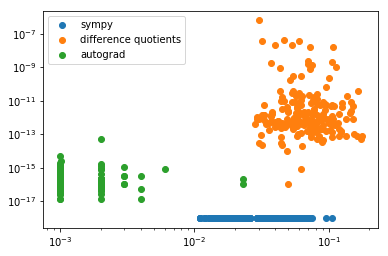

In [39]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(s_time, s_errors)
plt.scatter(d_time, d_errors)
plt.scatter(g_time, g_errors)
plt.legend(['sympy', 'difference quotients', 'autograd'])